In [7]:
# import libraries
import numpy as np
import cv2
from collections import deque
from skimage.color import label2rgb
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

### **Q1**

### **Q1.1**
Write code for the above skeletonization process and display the computed skeleton for the image thumb print.jpg. Note that the image will need to be binarized first ! You can use cv2.threshold or any other inbuilt function for binarization.

In [ ]:
def compare(a, b):
  for r in range(a.shape[0]):
    for c in range(a.shape[1]):
      if a[r][c] != -1 and a[r][c] != b[r][c]:
        return 0
  return 1

def skeletonize(img, S):
  result = img.copy()
  for r in range(int(S.shape[0]/2), img.shape[0] - int(S.shape[0]/2)):
    for c in range(int(S.shape[1]/2), img.shape[1] - int(S.shape[1]/2)):
      # If all positions on non don't care positions don't match then make pixel (black) 0
      if compare(S, img[r - int(S.shape[0] / 2): r + int(S.shape[0] / 2) + 1, c - int(S.shape[1] / 2): c + int(S.shape[1] / 2) + 1]):
        result[r][c] = 0
  return result

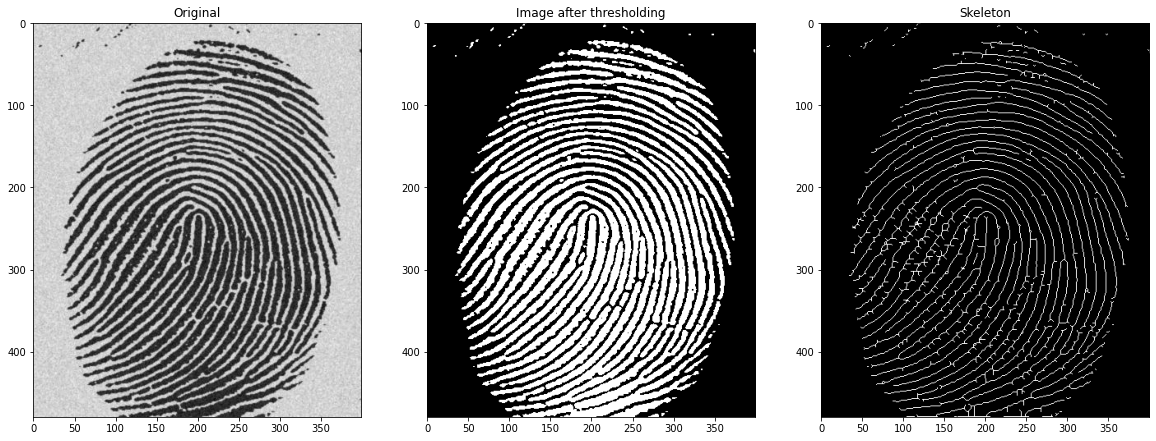

In [ ]:
# Reading image
img = cv2.imread('./../images/thumb_print.jpg', 0)

# Defining structuring elements
S1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
S2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY_INV)
thresholded_img = img.copy()

epochs = 12
for epoch in range(epochs):
  # Applying Skeletonization Pass
  for i in range(4):
    img = skeletonize(img, S1)
    img = skeletonize(img, S2)
    S1 = np.rot90(S1)
    S2 = np.rot90(S2)
  clear_output(wait=True)
  display(str(epoch + 1) + ' epochs done...')

# Flush last output
clear_output()

# Plotting
f, axarr = plt.subplots(1, 3, figsize=(20,15))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(thresholded_img, cmap='gray')
axarr[1].title.set_text('Image after thresholding')
axarr[2].imshow(img, cmap='gray')
axarr[2].title.set_text('Skeleton')

### **Q1.2**
Explain the role of structuring elements $S_1, S_2$.

**Answer:**

$S_1 -$ Detects edges and curve like edges

$S_2 -$ Detects right angles

### **Q1.3**
By analyzing the outputs at the end of each skeletonization pass, explain why multiple passes are/may be required.

**Answer:**

To detect the horizontal as well as vertical edges/curves rotating the structural elements are necessary. A more finer looking skeleton of the image is achieved by having multiple passes.

### **Q1.4**
Try out the skeletonization algorithm described above on dragon.jpg, butterfly.jpg and keyhole.jpg and comment on what you observe.

**Skeletonizing dragon.png**

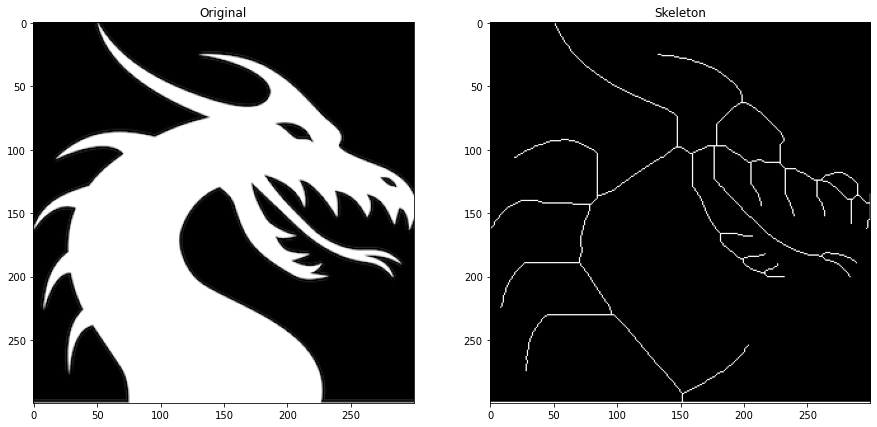

In [ ]:
# Reading image
img = cv2.imread('./../images/dragon.png', 0)

# Defining structuring elements
S1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
S2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)

epochs = 100
for epoch in range(epochs):
  # Applying Skeletonization Pass
  for i in range(4):
    img = skeletonize(img, S1)
    img = skeletonize(img, S2)
    S1 = np.rot90(S1)
    S2 = np.rot90(S2)
  clear_output(wait=True)
  display(str(epoch + 1) + ' epochs done...')

# Flush last output
clear_output()

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(img, cmap='gray')
axarr[1].title.set_text('Skeleton')

It took quite a few iterations (60) to fully skeletonize.

**Skeletonizing butterfly.jpg**

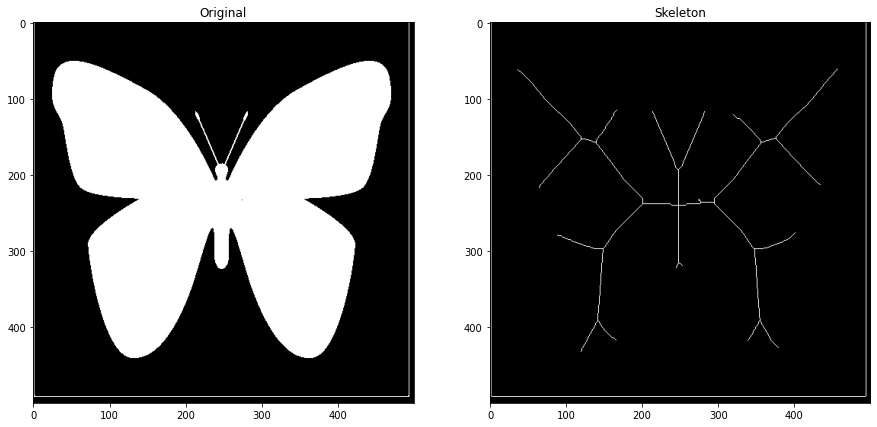

In [ ]:
# Reading image
img = cv2.imread('./../images/butterfly.jpg', 0)

# Defining structuring elements
S1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
S2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)

epochs = 80
for epoch in range(epochs):
  # Applying Skeletonization Pass
  for i in range(4):
    img = skeletonize(img, S1)
    img = skeletonize(img, S2)
    S1 = np.rot90(S1)
    S2 = np.rot90(S2)
  clear_output(wait=True)
  display(str(epoch + 1) + ' epochs done...')

# Flush last output
clear_output()

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(img, cmap='gray')
axarr[1].title.set_text('Skeleton')

It took more iterations (80) than the previous image to fully skeletonize.

**Skeletonizing keyhole.jpg**

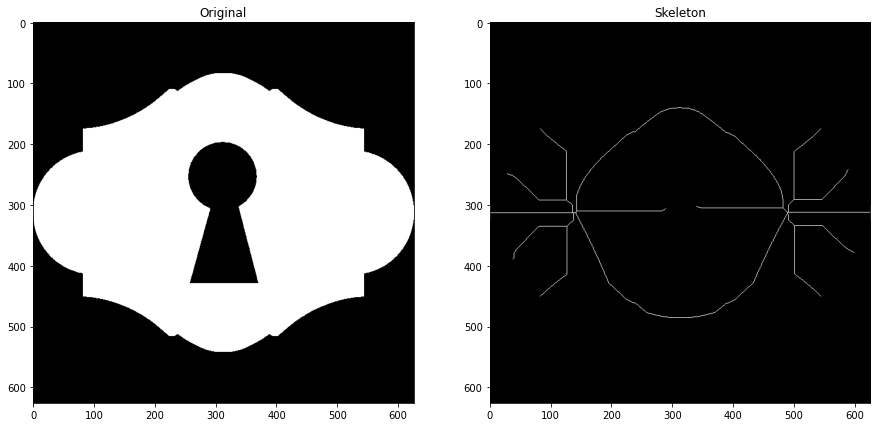

In [ ]:
# Reading image
img = cv2.imread('./../images/keyhole.jpg', 0)

# Defining structuring elements
S1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
S2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)

epochs = 150
for epoch in range(epochs):
  # Applying Skeletonization Pass
  for i in range(4):
    img = skeletonize(img, S1)
    img = skeletonize(img, S2)
    S1 = np.rot90(S1)
    S2 = np.rot90(S2)
  clear_output(wait=True)
  display(str(epoch + 1) + ' epochs done...')

# Flush last output
clear_output()

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(img, cmap='gray')
axarr[1].title.set_text('Skeleton')

This took the most iterations (150) to fully skeletonize. More than any of the previous images.

### **Q2**
Find the organs of interest in the provided CT image kidney.jpg. The organs of interest are as shown below.

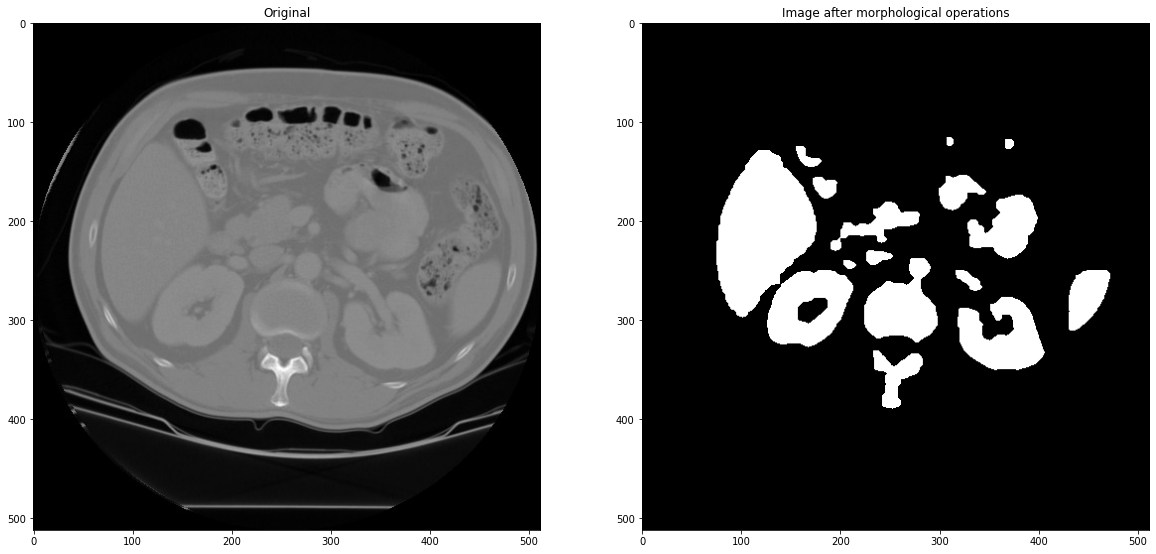

In [3]:
img = cv2.imread('./../images/kidney.jpg', 0)
original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 132, 255, cv2.THRESH_BINARY)
# Closing operation
img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (6, 6)))
# Opening operation
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10)))
# Eroding with structural element for 3 iterations
img = cv2.erode(img, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2)), iterations = 3)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(img, cmap='gray')
axarr[1].title.set_text('Image after morphological operations')

In [10]:
# Check if position of pixel is inside image and is not visited
def validate(a, b, img, vis):
  if len(img.shape) == 3:
    return not (a < 0 or a >= img.shape[0] or b < 0 or b >= img.shape[1] or (img[i][j] != img[a][b]).any() or vis[a][b] == 1)
  return not (a < 0 or a >= img.shape[0] or b < 0 or b >= img.shape[1] or img[a][b] == 0 or vis[a][b] == 1)

# BFS method to colour pixels
def BFS(x, y, c, img, vis, final_img, conn8=False):
  vis[x][y] = 1
  final_img[x][y] = colors[c]
  queue = deque([[x, y]])
  size_deque = 1
  total_pixels = 0
  while size_deque > 0:
    total_pixels += 1
    cur_pos = queue.popleft()
    size_deque -= 1
    if conn8:
      # 8 connectivity
      for i in range(-1, 2):
        for j in range(-1, 2):
          if (i != 0 or j != 0) and validate(cur_pos[0] + i, cur_pos[1] + j, img, vis):
            vis[cur_pos[0] + i][cur_pos[1] + j] = 1
            final_img[cur_pos[0] + i][cur_pos[1] + j] = colors[c]
            queue.append([cur_pos[0] + i, cur_pos[1] + j])
            size_deque += 1
    else:
      # 4 - connectivity
      # Bottom pixel
      if validate(cur_pos[0] + 1, cur_pos[1], img, vis):
        vis[cur_pos[0] + 1][cur_pos[1]] = 1
        final_img[cur_pos[0] + 1][cur_pos[1]] = colors[c]
        queue.append([cur_pos[0] + 1, cur_pos[1]])
        size_deque += 1
      # Top pixel
      if validate(cur_pos[0] - 1, cur_pos[1], img, vis):
        vis[cur_pos[0] - 1][cur_pos[1]] = 1
        final_img[cur_pos[0] - 1][cur_pos[1]] = colors[c]
        queue.append([cur_pos[0] - 1, cur_pos[1]])
        size_deque += 1
      # Right pixel
      if validate(cur_pos[0], cur_pos[1] + 1, img, vis):
        vis[cur_pos[0]][cur_pos[1] + 1] = 1
        final_img[cur_pos[0]][cur_pos[1] + 1] = colors[c]
        queue.append([cur_pos[0], cur_pos[1] + 1])
        size_deque += 1
      # Left pixel
      if validate(cur_pos[0], cur_pos[1] - 1, img, vis):
        vis[cur_pos[0]][cur_pos[1] - 1] = 1
        final_img[cur_pos[0]][cur_pos[1] - 1] = colors[c]
        queue.append([cur_pos[0], cur_pos[1] - 1])
        size_deque += 1
  # Return total number of pixels in the connected component
  return total_pixels

Overall Time Complexity = $O(n)$ and iterative

In [5]:
final_img = np.zeros((img.shape[0], img.shape[1], 3)).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(img.shape)
# Colours to use for marking connected components
colors = [[215, 194, 174], [0, 255, 0], [0, 0, 255], [237, 184, 121],
          [224, 123, 57], [105, 189, 210], [105, 189, 210], [101, 0, 255],
          [13, 222, 132], [255, 0, 203], [42, 194, 37], [255, 0, 0],
          [168, 75, 222], [194, 27, 138], [194, 152, 27], [27, 194, 191]]
colors = np.array(colors)
color = -1
# Color pixels (Find connected components)
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] != 0 and vis[i][j] == 0:
      color += 1
      BFS(i, j, color, img, vis, final_img)

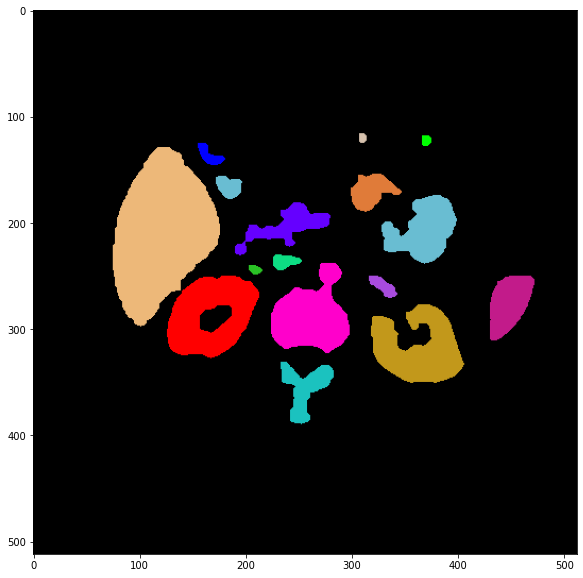

In [6]:
# Plotting final result
plt.figure(figsize=(10, 10))
plt.imshow(final_img)

### **Q3**
Read in the binary image coins.jpg and write a script which uses the image as input and outputs a new image containing

### **Q3.1**
only the coins touching the boundary of the image

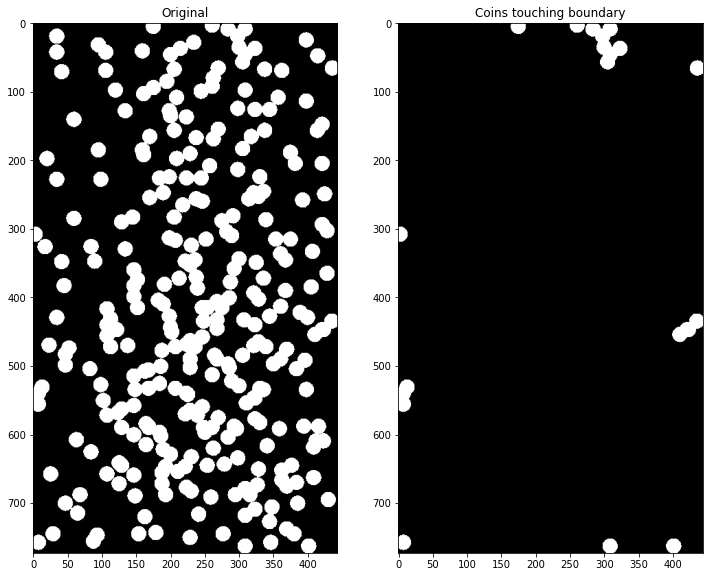

In [14]:
img = cv2.imread('./../images/coins.jpg', 0)
original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

final_img = np.zeros(img.shape).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(img.shape)
# Colours to use for marking connected components
colors = np.array([255])
# Color CC on boundary, i.e. run bfs on boundary pixels
for i in range(img.shape[0]):
  if img[i][0] != 0 and vis[i][0] == 0:
    BFS(i, 0, 0, img, vis, final_img)
for i in range(img.shape[0]):
  if img[i][img.shape[1] - 1] != 0 and vis[i][img.shape[1] - 1] == 0:
    BFS(i, img.shape[1] - 1, 0, img, vis, final_img)
for i in range(img.shape[1]):
  if img[0][i] != 0 and vis[0][i] == 0:
    BFS(0, i, 0, img, vis, final_img)
for i in range(img.shape[1]):
  if img[img.shape[0] - 1][i] != 0 and vis[img.shape[0] - 1][i] == 0:
    BFS(img.shape[0] - 1, i, 0, img, vis, final_img)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(12,10))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(final_img, cmap='gray')
axarr[1].title.set_text('Coins touching boundary')

### **Q3.2**
only the coins which overlap with each other

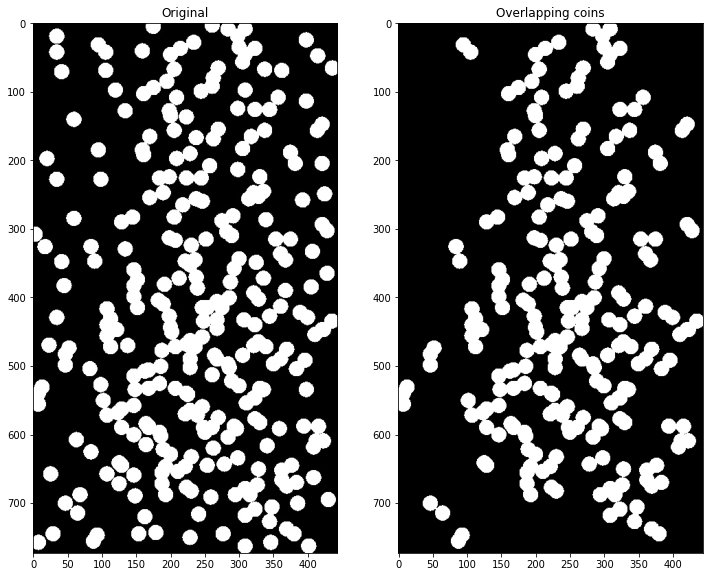

In [15]:
img = cv2.imread('./../images/coins.jpg', 0)
original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

final_img = np.zeros(img.shape).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(img.shape)
# Visited array helper array to remove non overlapping components
vis2 = np.zeros(img.shape)
# Colours to use for marking connected components
colors = np.array([255, 0])
# Color CC if total pixels is greater than 420
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] != 0 and vis[i][j] == 0:
      tot_pixels = BFS(i, j, 0, img, vis, final_img)
      if tot_pixels <= 420:
        BFS(i, j, 1, img, vis2, final_img)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(12,10))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(final_img, cmap='gray')
axarr[1].title.set_text('Overlapping coins')

### **Q3.3**
only non-overlapping coins

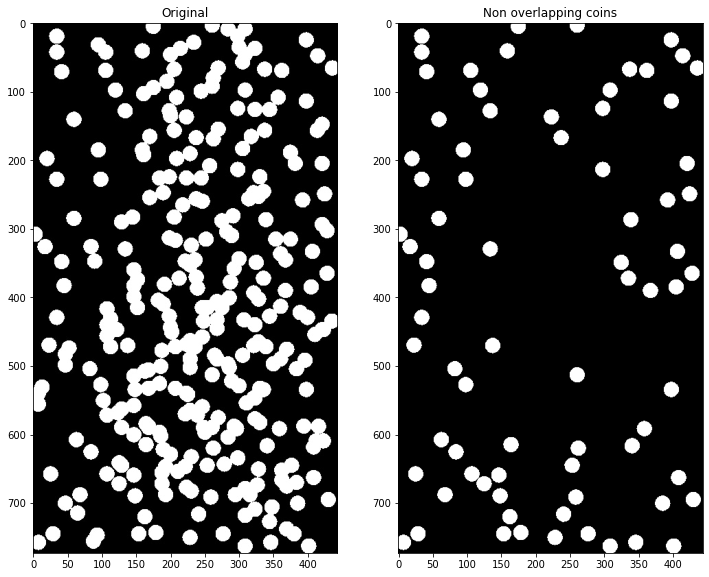

In [16]:
img = cv2.imread('./../images/coins.jpg', 0)
original = img.copy()
# Thresholding
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

final_img = np.zeros(img.shape).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(img.shape)
# Visited array helper array to remove overlapping components
vis2 = np.zeros(img.shape)
# Colours to use for marking connected components
colors = np.array([255, 0])
# Color CC if total pixels is greater than 420
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] != 0 and vis[i][j] == 0:
      tot_pixels = BFS(i, j, 0, img, vis, final_img)
      if tot_pixels > 420:
        BFS(i, j, 1, img, vis2, final_img)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(12,10))
axarr[0].imshow(original, cmap='gray')
axarr[0].title.set_text('Original')
axarr[1].imshow(final_img, cmap='gray')
axarr[1].title.set_text('Non overlapping coins')

### **Q4**
Read in the binary image objects.png and write a script which uses the image as input and uses morphological and logical operations to answer the questions below.

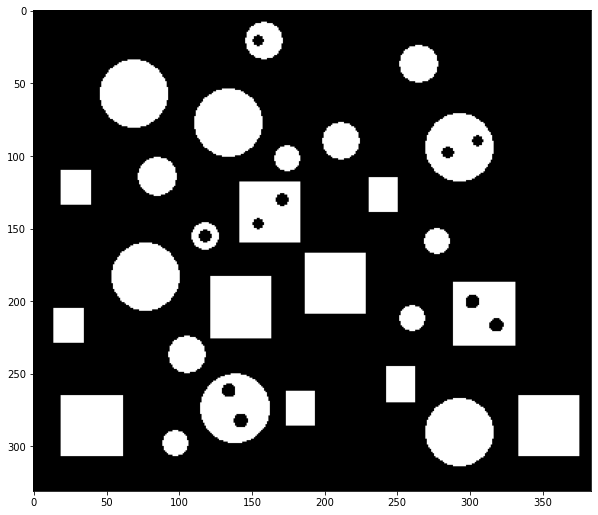

In [17]:
# Displaying the input image
img = cv2.imread('./../images/objects.png', 0)
# Thresholding
_, img = cv2.threshold(img, 127, 1, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

### **Q4.1**
How many objects have one or more holes?

**Logic:** For each object we make another image with only that object and it's holes filled. This can be achieved by using the closing operation. Then we find the number of connected components (which will be the holes) in the image $Filled - noFilled$ to find out if the object has holes or not.

In [18]:
# Checks if holes are present in the CC with (x, y) as one of its fg pixels
def holesPresent(x, y, img, vis):
  # Mark object
  final_img = np.zeros(img.shape).astype('uint8')
  BFS(x, y, 0, img, vis, final_img)
  # Image of object with holes
  img1 = final_img.copy()
  # Image of object without holes
  img2 = final_img.copy()
  # Removing holes from second image by performing closing operation
  img2 = cv2.dilate(img2, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), iterations = 2)
  img2 = cv2.erode(img2, cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5)), iterations = 2)
  # Image of holes in object
  holesImg = (img2 - img1).astype('uint8')
  vis2 = np.zeros(img.shape)
  holes = 0
  for i in range(holesImg.shape[0]):
    for j in range(holesImg.shape[1]):
      if holesImg[i][j] != 0 and vis2[i][j] == 0:
        holes += 1
        BFS(i, j, 0, holesImg, vis2, final_img)
  return holes > 0

In [19]:
# Visited array to keep track of visited pixels
vis = np.zeros(img.shape)
colors = np.array([1])
object_with_holes = 0
# BFS
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] != 0 and vis[i][j] == 0:
      object_with_holes += holesPresent(i, j, img, vis)

print('Number of objects with holes = ' + str(object_with_holes))

Number of objects with holes = 6


### **Q4.2**
How many square objects are in the image?

**Logic:** After eroding with the kernel as used below, the top and right edges of the objects will shrink by a small amount. Then we take difference of this with original to get image with this edges. After applying erosion with the same kernel, we get the corner locations, since only they satisfy the kernel. We count these using CC algo to get count of squares.

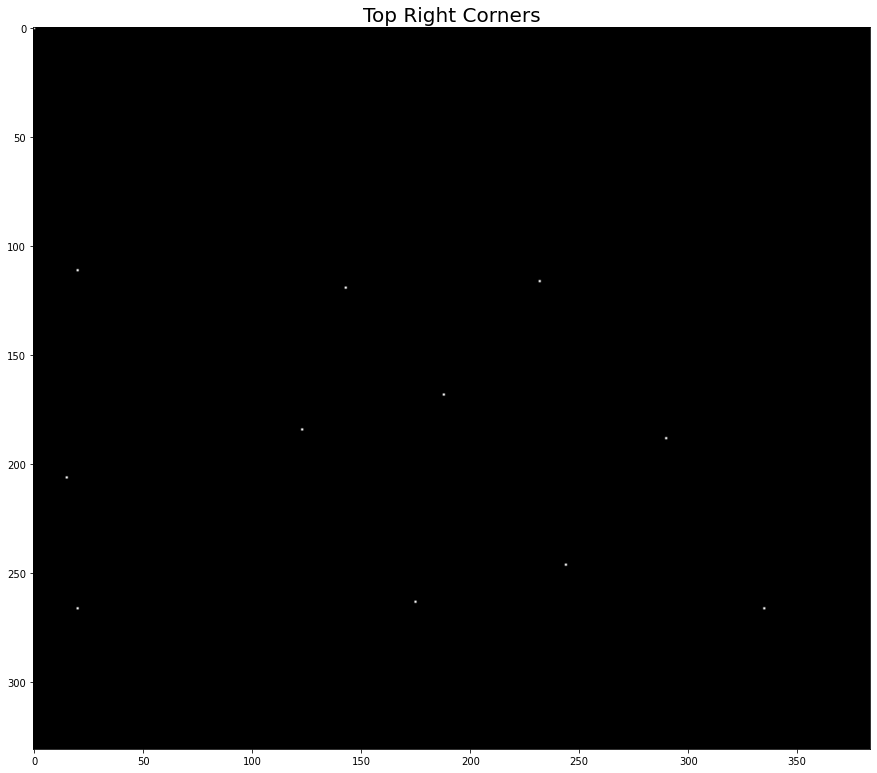

In [20]:
kernel = np.zeros((4,4),np.uint8)
for i in range(1, 4):
    kernel[1][i] = 1
    kernel[i][1] = 1

# Applying erosion with top right corner kernel
newimg = cv2.erode(img, kernel, iterations = 1)
newimg = cv2.erode(abs(newimg - img), kernel, iterations = 1)

plt.figure(figsize=(15, 15))
plt.title('Top Right Corners', fontsize = 20)
plt.imshow(newimg, cmap='gray')

In [21]:
final_img = np.zeros(newimg.shape).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(newimg.shape)
# Colours to use for marking connected components
colors = np.array([0])
# Find number of squares i.e. corners
sqrs = 0
for i in range(1, newimg.shape[0]):
  for j in range(1, newimg.shape[1]):
    if newimg[i][j] != 0 and vis[i][j] == 0:
      sqrs += 1
      BFS(i, j, 0, newimg, vis, final_img)

print('Number of square objects in image = ' + str(sqrs))

Number of square objects in image = 11


### **Q4.3**
Identify the square objects that have holes.

**Logic:** 

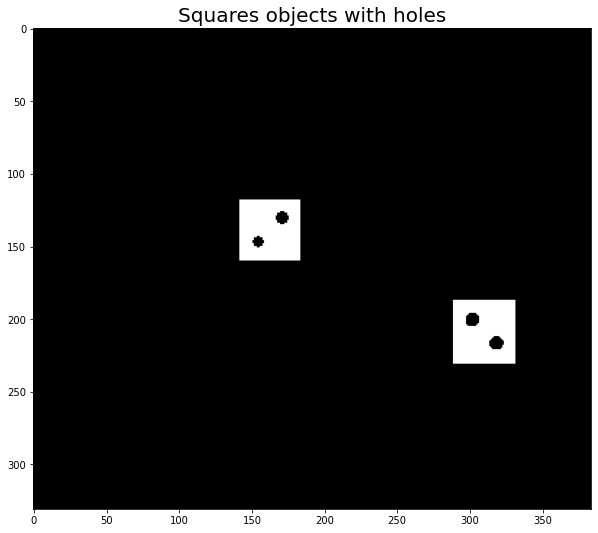

In [22]:
final_img = np.zeros(img.shape).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(img.shape)
vis2 = np.zeros(img.shape)
colors = np.array([1])
# BFS
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] != 0 and vis[i][j] == 0 and newimg[i][j] != 0:
      if holesPresent(i, j, img, vis):
        BFS(i, j, 0, img, vis2, final_img)

plt.figure(figsize=(10, 10))
plt.title('Squares objects with holes', fontsize = 20)
plt.imshow(final_img, cmap='gray')

### **Q4.4**
Identify the circular objects that have no holes.

**Logic:** 

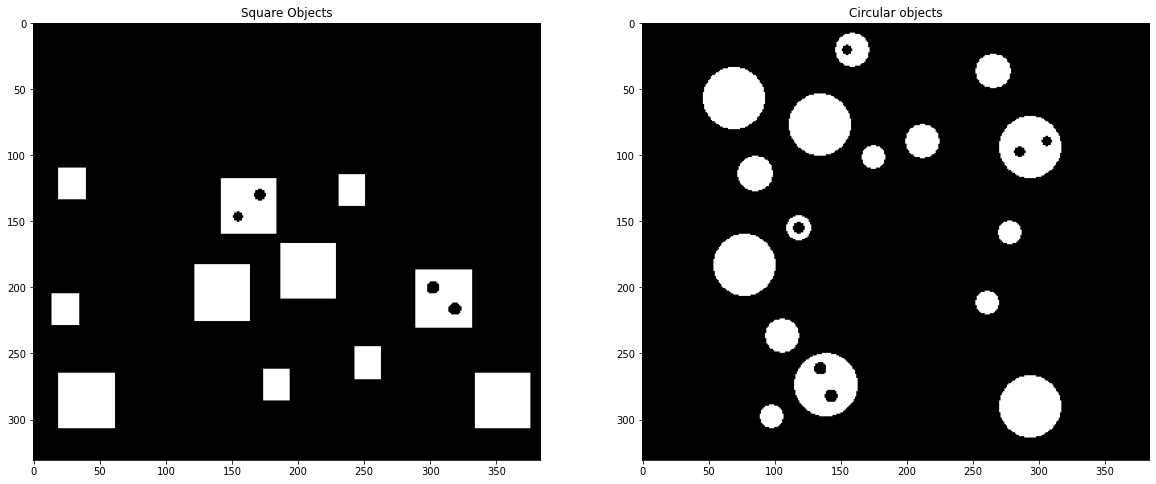

In [23]:
sqrImg = np.zeros(img.shape).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(img.shape)
vis2 = np.zeros(img.shape)
colors = np.array([1])
# BFS
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if img[i][j] != 0 and vis[i][j] == 0 and newimg[i][j] != 0:
      BFS(i, j, 0, img, vis, sqrImg)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(sqrImg, cmap='gray')
axarr[0].title.set_text('Square Objects')
circImg = img - sqrImg
axarr[1].imshow(circImg, cmap='gray')
axarr[1].title.set_text('Circular objects')

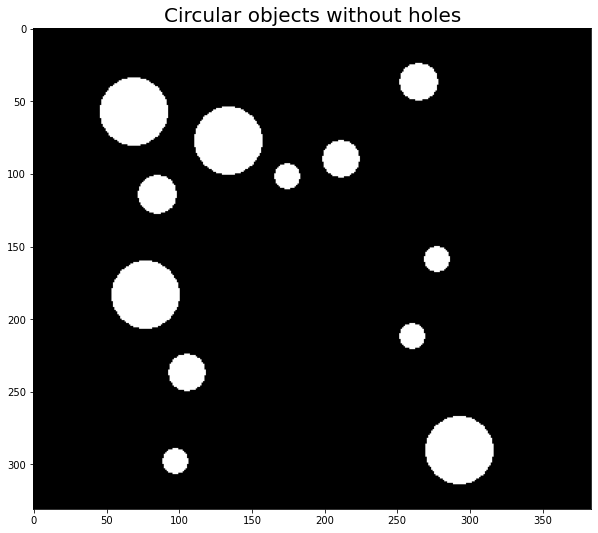

In [24]:
final_img = np.zeros(circImg.shape).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros(circImg.shape)
vis2 = np.zeros(circImg.shape)
colors = np.array([1])
# BFS to mark circles without any holes
for i in range(circImg.shape[0]):
  for j in range(circImg.shape[1]):
    if circImg[i][j] != 0 and vis[i][j] == 0:
      if not holesPresent(i, j, circImg, vis):
        BFS(i, j, 0, circImg, vis2, final_img)

plt.figure(figsize=(10, 10))
plt.title('Circular objects without holes', fontsize = 20)
plt.imshow(final_img, cmap='gray')

### **Q5**
The questions below pertain to connected components. In the questions below, assume 8-connectivity.

### **Q5.1**
The image colourful text.png contains text characters in five different colors. Write a script which takes the image as input and outputs the number of components for each of the five colors. Note that the components may be non-letters (e.g. . and |).

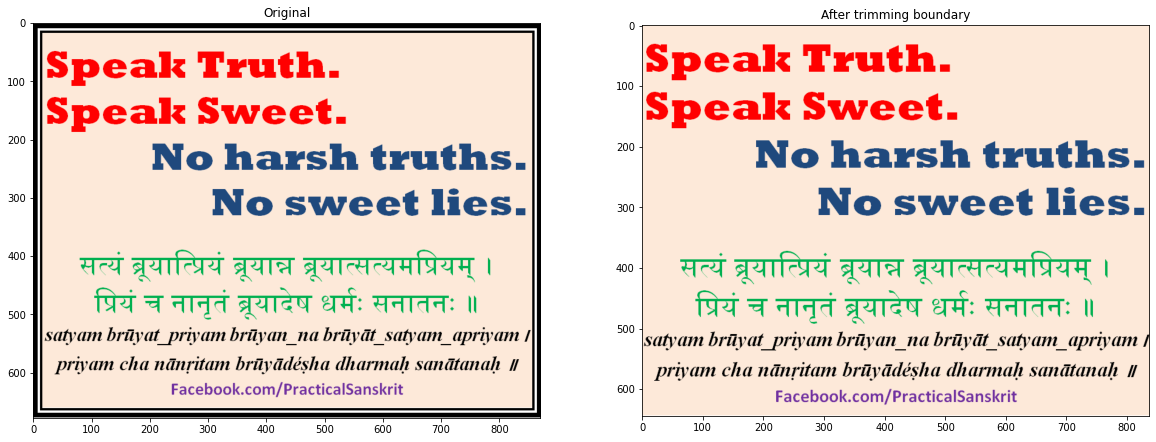

In [11]:
img = cv2.cvtColor(cv2.imread('./../images/colourful_text.png'), cv2.COLOR_BGR2RGB)

# Removing boundary from image
offset = 17
imgwb = img[offset:img.shape[0] - offset, offset:img.shape[1] - offset]

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(img)
axarr[0].title.set_text('Original')
axarr[1].imshow(imgwb)
axarr[1].title.set_text('After trimming boundary')

In [12]:
# Dictionary to store all different colour counts
dictColours = {}

# hashing count
for r in imgwb:
  for c in r:
    try:
      x = dictColours[tuple(c)]
      dictColours[tuple(c)] += 1
    except:
      dictColours[tuple(c)] = 1

# Removing the yellowish colour which has the most count and keeping the next 5 colours
dictColours = sorted(dictColours.items(), key = lambda x:(x[1], x[0]))[-6:-1]
colours = [i[0] for i in dictColours]

In [13]:
# Count dictionary to store count of CCs
count = {}

for i in colours:
  count[i] = 0

final_img = np.zeros((imgwb.shape[0], imgwb.shape[1], 3)).astype('uint8')
# Visited array to keep track of visited pixels
vis = np.zeros((imgwb.shape[0], imgwb.shape[1]))
# Colours to use for marking connected components
colors = np.array([255])
# Color pixels (Find connected components)
for i in range(imgwb.shape[0]):
  for j in range(imgwb.shape[1]):
    if vis[i][j] == 0:
      BFS(i, j, 0, imgwb, vis, final_img, conn8=True)
      if tuple(imgwb[i][j]) in count.keys():
        count[tuple(imgwb[i][j])] += 1

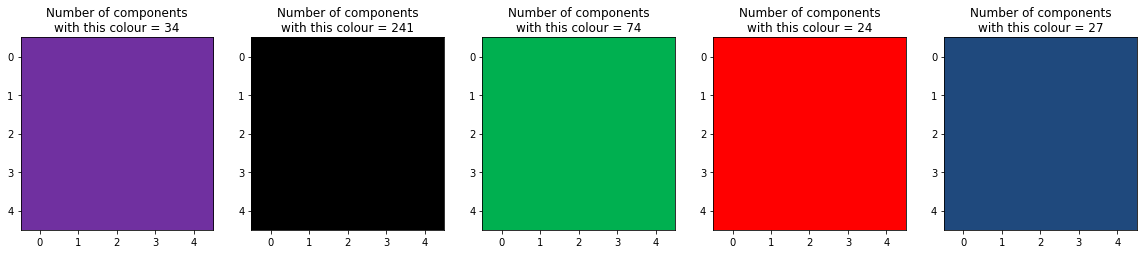

In [14]:
# Plotting result
f, axarr = plt.subplots(1, 5, figsize=(20, 5))
ind = 0
for c in count:
  axarr[ind].imshow(np.tile(np.array(c), 5 * 5).reshape((5, 5, 3)))
  axarr[ind].title.set_text('Number of components\nwith this colour = ' + str(count[c]))
  ind += 1

### **Q5.2**
For telugu.jpeg and tamil.jpeg write a script which produces a binary image containing.

### **Q5.2.a**
Only those letters that enclose one empty region (e.g. examples of English letters containing a single empty region are - o,e,a)

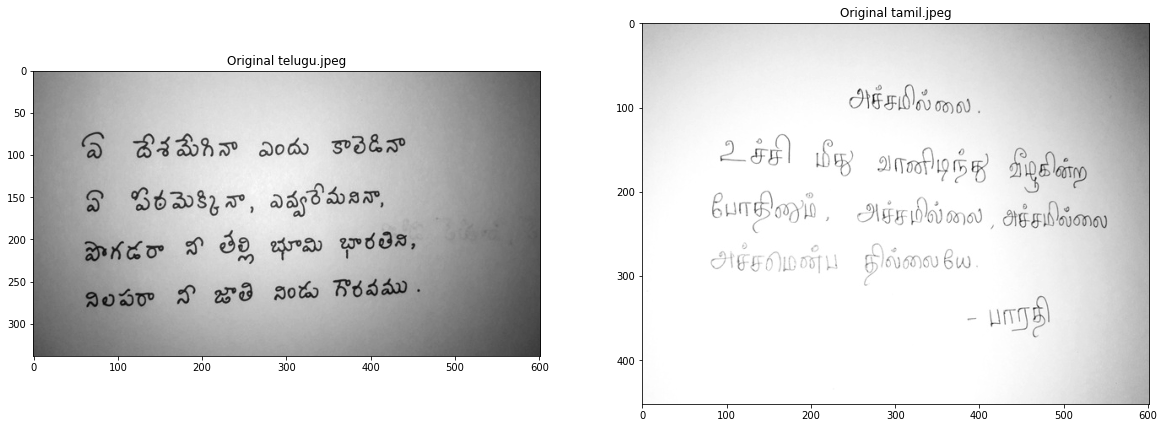

In [15]:
# Reading
telugu = cv2.imread('./../images/telugu.jpeg', 0)
tamil = cv2.imread('./../images/tamil.jpeg', 0)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(telugu, cmap='gray')
axarr[0].title.set_text('Original telugu.jpeg')
axarr[1].imshow(tamil, cmap='gray')
axarr[1].title.set_text('Original tamil.jpeg')

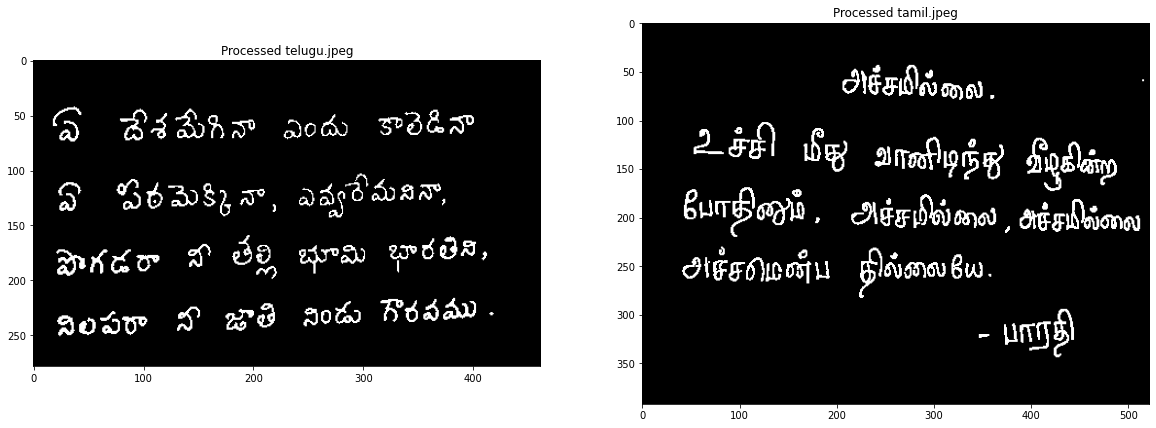

In [16]:
# Cropping required region
telugu = telugu[30: telugu.shape[0] - 30, 40: telugu.shape[1] - 100]
tamil = tamil[30: tamil.shape[0] - 30, 40: tamil.shape[1] - 40]

# Thresholding
_, telugu = cv2.threshold(telugu, 90, 1, cv2.THRESH_BINARY_INV)
tamil = cv2.adaptiveThreshold(tamil, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 20)
# Dilating Tamil image
tamil = cv2.dilate(tamil, cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2)), iterations = 1)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(telugu, cmap='gray')
axarr[0].title.set_text('Processed telugu.jpeg')
axarr[1].imshow(tamil, cmap='gray')
axarr[1].title.set_text('Processed tamil.jpeg')

In [17]:
# Modified BFS for 8-connectivity
# Update coordinates
def updCoords(x, y, x1, y1):
  x1[0] = min(x1[0], x)
  x1[1] = max(x1[1], x)
  y1[0] = min(y1[0], y)
  y1[1] = max(y1[1], y)

# Check if position of pixel is inside image and is not visited
def validatem(a, b, img, vis):
  return not (a < 0 or a >= img.shape[0] or b < 0 or b >= img.shape[1] or img[a][b] == 0 or vis[a][b] == 1)

# BFS method to mark pixels and return coordinate of the CC
def BFSm(x, y, img, vis):
  vis[x][y] = 1
  queue = deque([[x, y]])
  size_deque = 1
  x1 = [x, x]
  y1 = [y, y]
  while size_deque > 0:
    cur_pos = queue.popleft()
    size_deque -= 1
    # 8 connectivity
    for i in range(-1, 2):
      for j in range(-1, 2):
        if (i != 0 or j != 0) and validatem(cur_pos[0] + i, cur_pos[1] + j, img, vis):
          updCoords(cur_pos[0] + i, cur_pos[1] + j, x1, y1)
          vis[cur_pos[0] + i][cur_pos[1] + j] = 1
          queue.append([cur_pos[0] + i, cur_pos[1] + j])
          size_deque += 1
  return np.array([[x1[0] - 1, y1[0] - 1], [x1[1] + 1, y1[1] + 1]])

# Returns array containing coordinates of all CCs
def coordCC(img):
  # Visited array to keep track of visited pixels
  vis = np.zeros(img.shape)
  # Mark pixels
  coords = []
  positions = []
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      if img[i][j] != 0 and vis[i][j] == 0:
        coords.append(BFSm(i, j, img, vis))
        positions.append([i, j])
  
  return [np.array(coords), positions]

In [18]:
# Marks letters with k holes
def kHoleImg(img, coords, k):
  positions = coords[1]
  coords = coords[0]
  # get images slices from coordinates
  imgSlices = []
  for i in coords:
    imgSlices.append(img[i[0][0]:i[1][0] + 1, i[0][1]:i[1][1] + 1])
  
  # Removing other letters in slice
  for i in range(len(positions)):
    final_img = np.zeros(imgSlices[i].shape).astype('uint8')
    # Colours to use for marking connected components
    BFSm(positions[i][0] - coords[i][0][0], positions[i][1] - coords[i][0][1], imgSlices[i], final_img)
    imgSlices[i] = 1 - final_img

  result = np.zeros(img.shape).astype('int')
  for it in range(len(imgSlices)):
    im = imgSlices[it]
    vis = np.zeros(im.shape)
    c = -1
    for i in range(im.shape[0]):
      for j in range(im.shape[1]):
        if im[i][j] != 0 and vis[i][j] == 0:
          c += 1
          BFSm(i, j, im, vis)
    if c == k:
      im = 1 - im
      result[coords[it][0][0]:coords[it][1][0] + 1, coords[it][0][1]:coords[it][1][1] + 1] = im

  return result

colors = np.array([1])

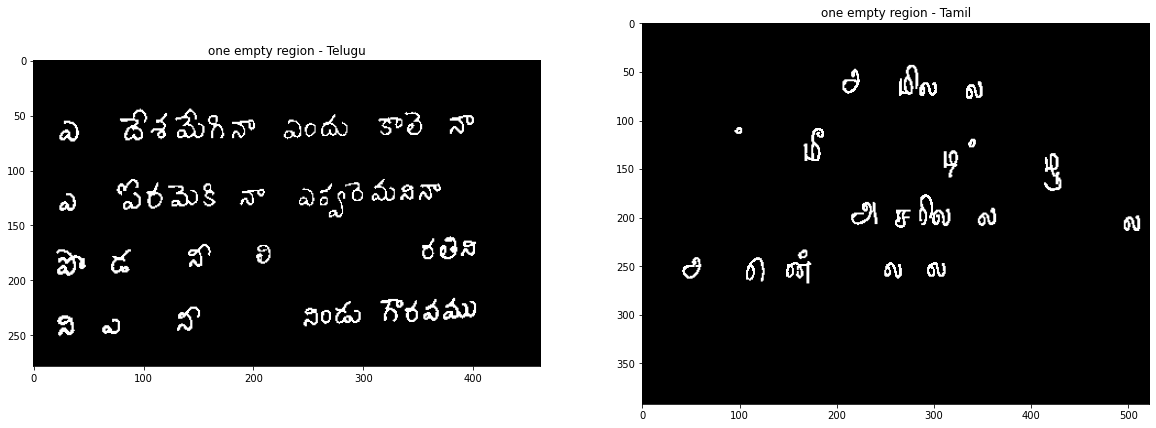

In [19]:
telugu1Hole = kHoleImg(telugu, coordCC(telugu), 1)
tamil1Hole = kHoleImg(tamil, coordCC(tamil), 1)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(telugu1Hole, cmap='gray')
axarr[0].title.set_text('one empty region - Telugu')
axarr[1].imshow(tamil1Hole, cmap='gray')
axarr[1].title.set_text('one empty region - Tamil')

### **Q5.2.b**
only those letters that enclose two empty regions (e.g. example letter from English - g, B)

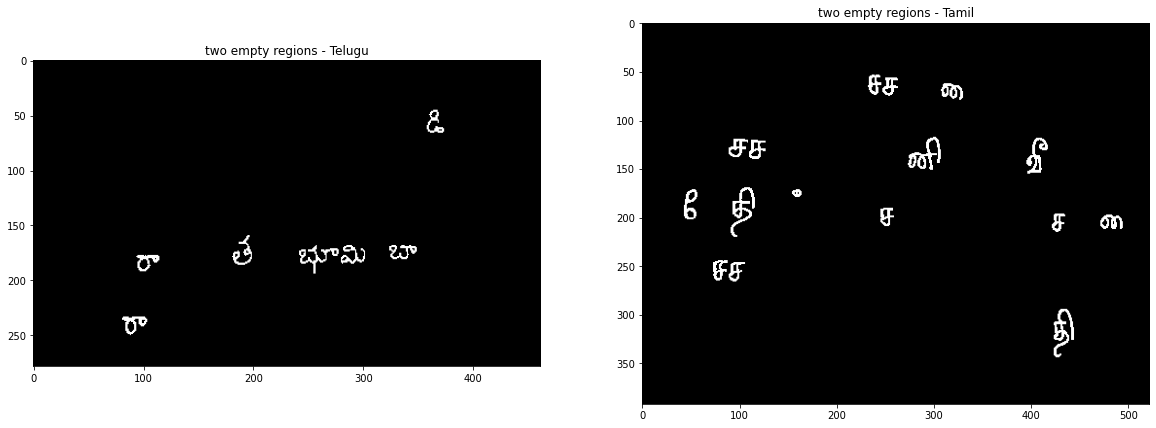

In [20]:
telugu2Hole = kHoleImg(telugu, coordCC(telugu), 2)
tamil2Hole = kHoleImg(tamil, coordCC(tamil), 2)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(telugu2Hole, cmap='gray')
axarr[0].title.set_text('two empty regions - Telugu')
axarr[1].imshow(tamil2Hole, cmap='gray')
axarr[1].title.set_text('two empty regions - Tamil')

### **Q6**
Given the label map of a scene,

### **Q6.1**
How do you upscale the label map by factor k?

**Logic:** [Nearest Neighbour Interpolation](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)

Substituting the pixel in new image with the nearest pixel in the equivalent realtive position in 2nd image.

suppose we wan't to find the position of pixel in old image for position (x, y) in new image. Then we can just use the backward interpolation formula. Theoretically:

$(x, y)$ in new image will be mapped to $(\dfrac{x * oldImageXSize}{newImageXSize}, \dfrac{y * oldImageYSize}{newImageYSize})$ of old image.

**Why NN Interpolation?**

We could use methods like Bilinear, Bicubic, Sinc, Lanczos, etc. But we are working with a label map where the values are fixed and should not be changed.

Hence we use NN Interpolation because the values don't get changed when mapped to the new dimensions.

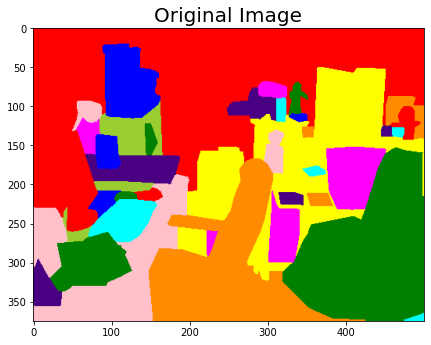

In [32]:
img = cv2.imread('./../images/labelMap.png', 0)

# Plotting
plt.figure(figsize=(7, 7))
plt.title(label="Original Image", fontsize=20)
plt.imshow(label2rgb(img), cmap='gray')

In [25]:
# NN algo
def upscaleImg(img, k):
  # Finding new size of image
  newsize = np.rint(np.array(img.shape) * k).astype('int')
  # Initializing final image with zeroes
  result = np.zeros(newsize)
  # Scaling factor for indices
  factorX = (img.shape[0] - 1) / (newsize[0] - 1)
  factorY = (img.shape[1] - 1) / (newsize[1] - 1)
  # Applying to all indices
  for r in range(newsize[0]):
    for c in range(newsize[1]):
      result[r][c] = img[np.int(np.rint(r * factorX))][np.int(np.rint(c * factorY))]
  return result

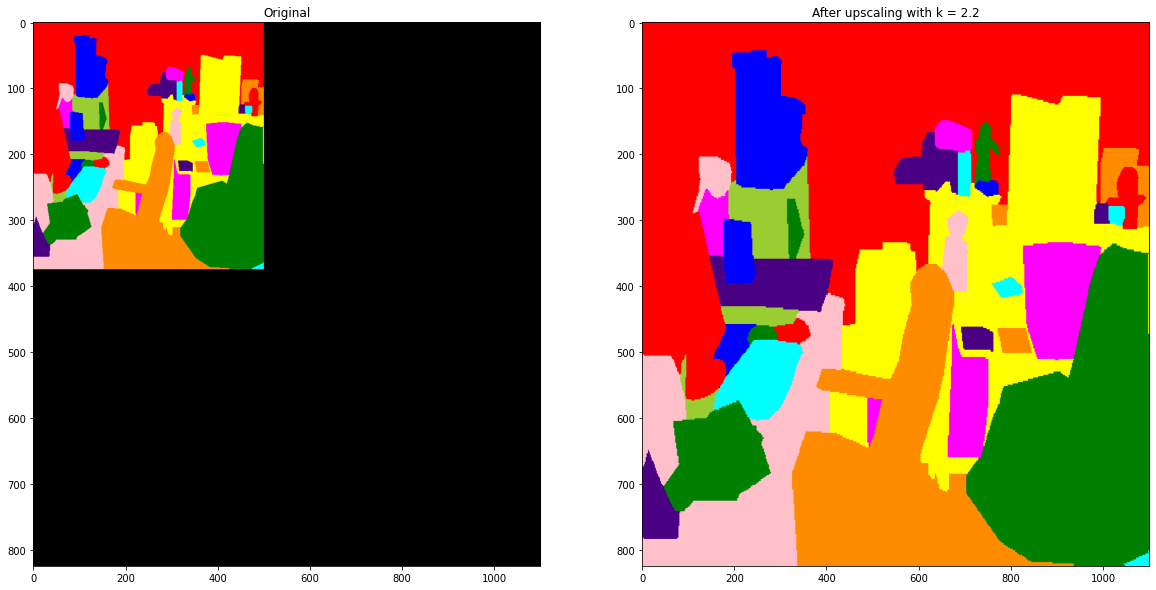

In [27]:
k = 2.2
upscaledImg = upscaleImg(img, k)

origImg = np.zeros((upscaledImg.shape[0], upscaledImg.shape[1], 3))
origImg[0:img.shape[0], 0:img.shape[1], :] = label2rgb(img)

# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(origImg, aspect="auto")
axarr[0].title.set_text('Original')
axarr[1].imshow(label2rgb(upscaledImg), aspect="auto")
axarr[1].title.set_text('After upscaling with k = ' + str(k))

### **Q6.2**
How do you rotate the label map by θ?

**Logic:** Coordinate Mapping

New coordinates will be (considering the centre of image to be the origin):

$newX = cos(θ)*x - sin(θ)*y$

$newY = sin(θ)*x + cos(θ)*y$

Similarly:

$x = cos(θ)*newX + sin(θ)*newY$

$y = cos(θ)*newY - sin(θ)*newX$

Again we don't use any complex interpolation method because the values need to be preserved.

In [34]:
def rotImg(img2, theta):
  img = img2.copy()
  # Making dimensions of image odd
  if img.shape[0] % 2 == 0:
    img = np.vstack([img, np.zeros((1, img.shape[1]))])
  if img.shape[1] % 2 == 0:
    img = np.hstack([img, np.zeros((img.shape[0], 1))])
  # Rotation matrix
  sinVal = np.sin(theta * np.pi / 180)
  cosVal = np.cos(theta * np.pi / 180)
  rotMat = np.array([[cosVal, sinVal], [-sinVal, cosVal]])
  maxPos = np.int(np.ceil(np.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2))) + 5
  newImg = np.zeros((2 * maxPos + 1, 2 * maxPos + 1))
  # Center to rotate about
  center1 = np.array([img.shape[0] // 2, img.shape[1] // 2])
  center2 = np.array([newImg.shape[0] // 2, newImg.shape[1] // 2])
  for r in range(newImg.shape[0]):
    for c in range(newImg.shape[1]):
      pos = np.rint(np.array([r - center2[0], c - center2[1]]) @ rotMat).astype('int')
      if pos[0] + center1[0] >= 0 and pos[0] + center1[0] < img.shape[0] and pos[1] + center1[1] >= 0 and pos[1] + center1[1] < img.shape[1]:
        newImg[r][c] = img[pos[0] + center1[0]][pos[1] + center1[1]]
  # Trimming extra space
  x = [0, newImg.shape[0] - 1]
  y = [0, newImg.shape[1] - 1]
  while (newImg[x[0]] == 0).all():
    x[0] += 1
  while (newImg[x[1]] == 0).all():
    x[1] -= 1
  while (newImg[:, y[0]] == 0).all():
    y[0] += 1
  while (newImg[:, y[1]] == 0).all():
    y[1] -= 1
  return newImg[x[0]:x[1] + 1, y[0]:y[1] + 1]

In [45]:
theta = 90
rotatedImg = rotImg(img, theta)

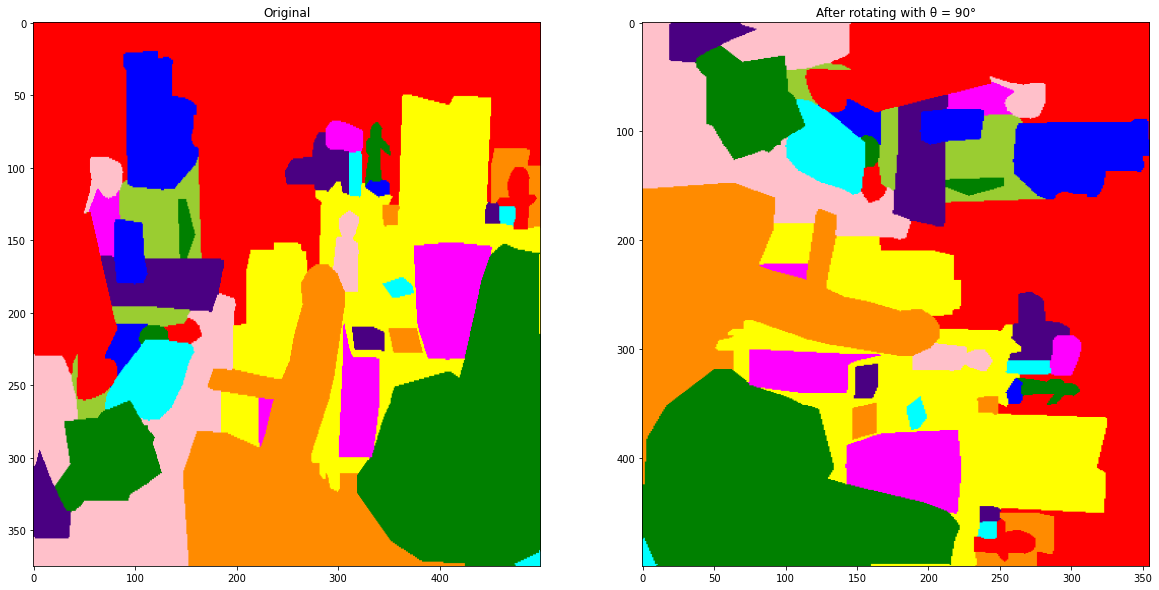

In [46]:
# Plotting
f, axarr = plt.subplots(1, 2, figsize=(20,10))
axarr[0].imshow(label2rgb(img), cmap='gray', aspect="auto")
axarr[0].title.set_text('Original')
axarr[1].imshow(label2rgb(rotatedImg), cmap='gray', aspect="auto")
axarr[1].title.set_text('After rotating with θ = ' + str(theta) + '°')

### **Q7**
Image rotation:

### **Q7.1**

**Logic:** Coordinate Mapping

New coordinates will be (considering the centre of image to be the origin):

$newX = cos(θ)*x - sin(θ)*y$

$newY = sin(θ)*x + cos(θ)*y$

Similarly:

$x = cos(θ)*newX + sin(θ)*newY$

$y = cos(θ)*newY - sin(θ)*newX$

In [ ]:
def rotImage(imputImg, theta, retain=False):
  sizee = np.array(imputImg.shape)
  sizee[0] += (sizee[0] % 2 == 0)
  sizee[1] += (sizee[1] % 2 == 0)
  # Making dimensions of image odd
  img = np.zeros(sizee)
  img[0:imputImg.shape[0], 0:imputImg.shape[1]] = imputImg
  # Rotation matrix
  sinVal = np.sin(theta * np.pi / 180)
  cosVal = np.cos(theta * np.pi / 180)
  rotMat = np.array([[cosVal, sinVal], [-sinVal, cosVal]])
  maxPos = np.int(np.ceil(np.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2))) + 5
  newImg = np.zeros((2 * maxPos + 1, 2 * maxPos + 1, 3))
  # Center to rotate about
  center1 = np.array([img.shape[0] // 2, img.shape[1] // 2])
  center2 = np.array([newImg.shape[0] // 2, newImg.shape[1] // 2])
  for r in range(newImg.shape[0]):
    for c in range(newImg.shape[1]):
      pos = np.rint(np.array([r - center2[0], c - center2[1]]) @ rotMat).astype('int')
      if pos[0] + center1[0] >= 0 and pos[0] + center1[0] < img.shape[0] and pos[1] + center1[1] >= 0 and pos[1] + center1[1] < img.shape[1]:
        newImg[r][c] = img[pos[0] + center1[0]][pos[1] + center1[1]]
  # Trimming extra space
  x = [0, newImg.shape[0] - 1]
  y = [0, newImg.shape[1] - 1]
  if retain:
    x[0] = center2[0] - center1[0] + 1
    x[1] = center2[0] + center1[0] - 1
    y[0] = center2[1] - center1[1] + 1
    y[1] = center2[1] + center1[1] - 1
  else:
    while (newImg[x[0]] == 0).all():
      x[0] += 1
    while (newImg[x[1]] == 0).all():
      x[1] -= 1
    while (newImg[:, y[0], :] == 0).all():
      y[0] += 1
    while (newImg[:, y[1], :] == 0).all():
      y[1] -= 1
  return newImg[x[0]:x[1] + 1, y[0]:y[1] + 1].astype('uint8')

In [ ]:
img = cv2.cvtColor(cv2.imread('./../images/bolt.jpg'), cv2.COLOR_BGR2RGB)
theta = 45
imgRetain = rotImage(img, theta, retain=True)
imgNoRetain = rotImage(img, theta, retain=False)

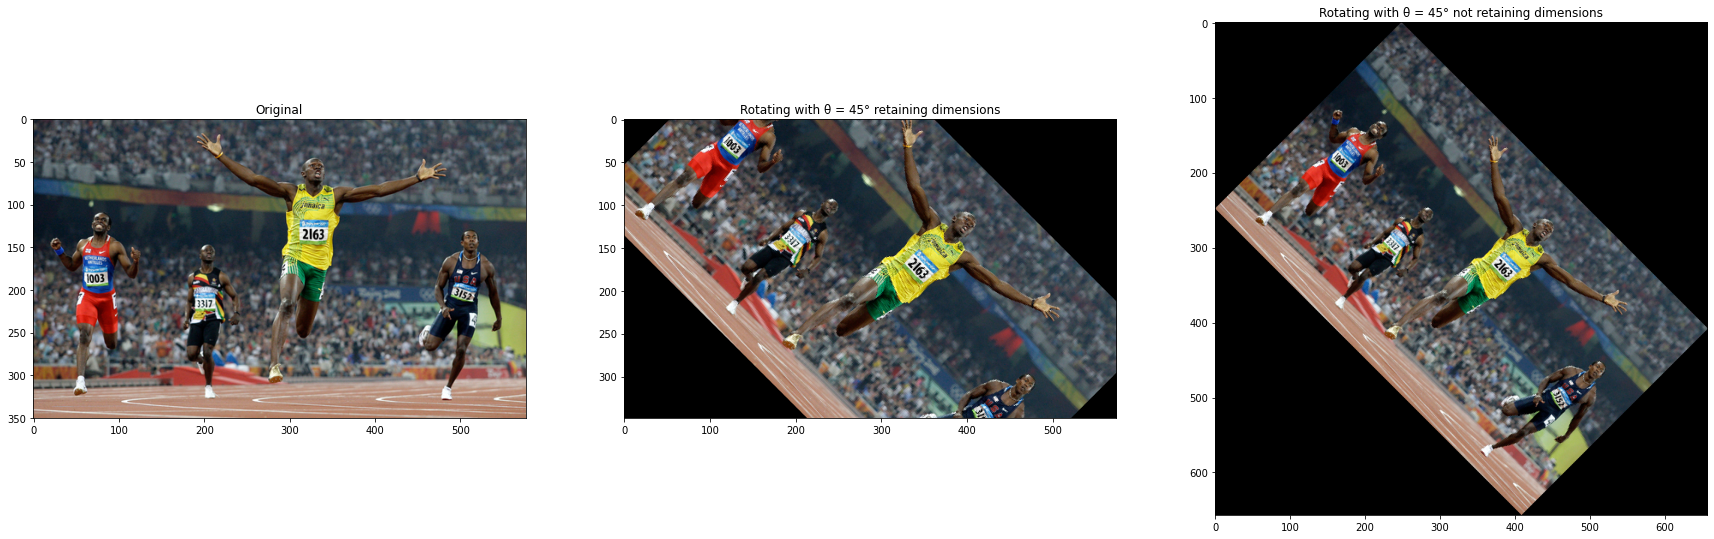

In [ ]:
# Plotting
f, axarr = plt.subplots(1, 3, figsize=(30,20))
axarr[0].imshow(img)
axarr[0].title.set_text('Original')
axarr[1].imshow(imgRetain)
axarr[1].title.set_text('Rotating with θ = ' + str(theta) + '° retaining dimensions')
axarr[2].imshow(imgNoRetain)
axarr[2].title.set_text('Rotating with θ = ' + str(theta) + '° not retaining dimensions')

### **Q7.2**
Show outputs of a rectangular image of your choice with angle 30◦ , 45◦ , 90◦ and 2 other angles of your choice.

In [ ]:
img30 = rotImage(img, 30, retain=False)
img45 = rotImage(img, 45, retain=False)
img69 = rotImage(img, 69, retain=False)
img90 = rotImage(img, 90, retain=False)
img180 = rotImage(img, 180, retain=False)

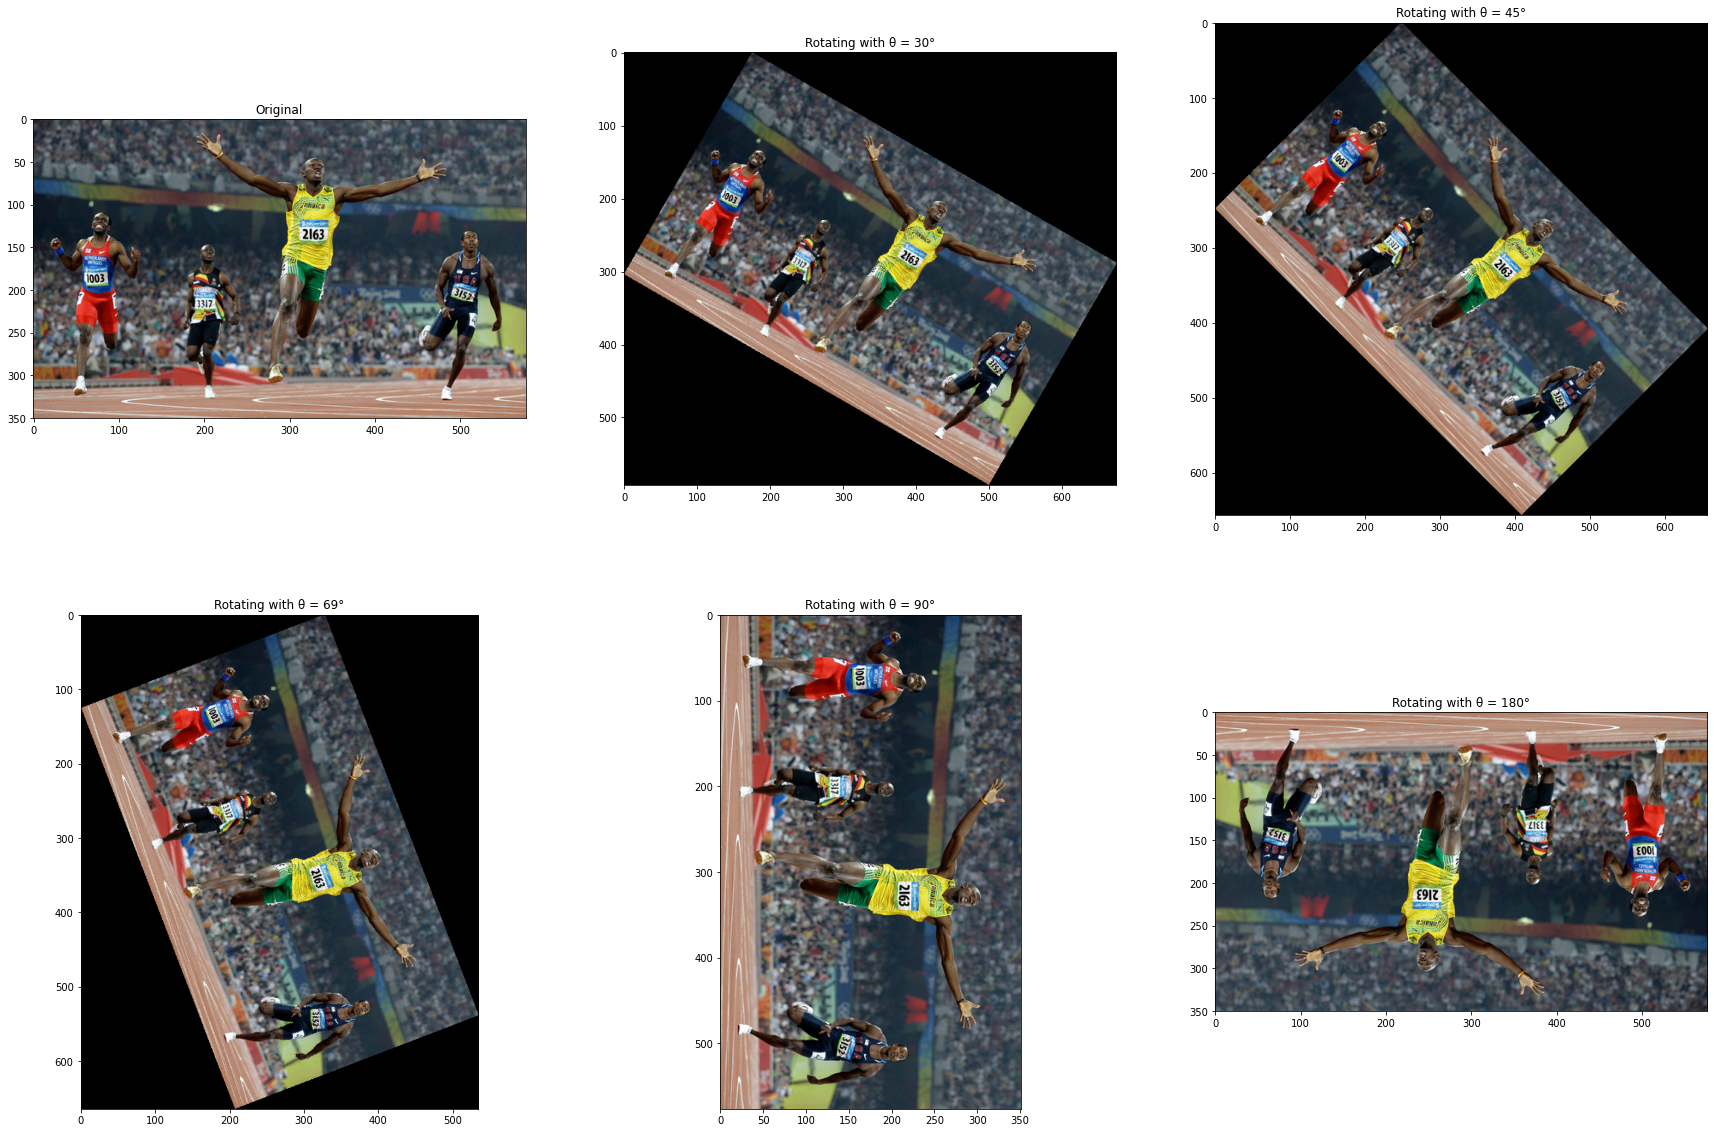

In [ ]:
# Plotting
f, axarr = plt.subplots(2, 3, figsize=(30,20))
axarr[0][0].imshow(img)
axarr[0][0].title.set_text('Original')
axarr[0][1].imshow(img30)
axarr[0][1].title.set_text('Rotating with θ = 30°')
axarr[0][2].imshow(img45)
axarr[0][2].title.set_text('Rotating with θ = 45°')
axarr[1][0].imshow(img69)
axarr[1][0].title.set_text('Rotating with θ = 69°')
axarr[1][1].imshow(img90)
axarr[1][1].title.set_text('Rotating with θ = 90°')
axarr[1][2].imshow(img180)
axarr[1][2].title.set_text('Rotating with θ = 180°')